# AdaBoost step by step

Reference: https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

Code: https://github.com/jamesajeeth/Data-Science/blob/master/Adaboost%20from%20scratch/Boosting%20Algorithm%20from%20scratch%20updated.ipynb

In [1]:
import pandas as pd

In [2]:
#importing file
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#considering only two classes
example = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

In [7]:
example

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
#replacing the two classes with +1 and -1 
# so that the classifier can be set for classes with far values 

class_label = example['species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

# adding back the class labels with +1 and -1 
# as 'Label' column in the example data frame
example = pd.concat([example, class_label.rename('Label')], axis=1)

In [9]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1


In [10]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,Label
145,6.7,3.0,5.2,2.3,virginica,-1
146,6.3,2.5,5.0,1.9,virginica,-1
147,6.5,3.0,5.2,2.0,virginica,-1
148,6.2,3.4,5.4,2.3,virginica,-1
149,5.9,3.0,5.1,1.8,virginica,-1


In [11]:
# we no longer need the 'species' column as 'Label' column is used for the training purpose
example = example.drop('species', axis = 1)

In [34]:
# now, the example data set has new column
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [13]:
# Initially assign same weights to each records in the dataset
# Set probability to (1 / no. of rows)

example['probR1'] = 1/(example.shape[0])

In [14]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [15]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
145,6.7,3.0,5.2,2.3,-1,0.01
146,6.3,2.5,5.0,1.9,-1,0.01
147,6.5,3.0,5.2,2.0,-1,0.01
148,6.2,3.4,5.4,2.3,-1,0.01
149,5.9,3.0,5.1,1.8,-1,0.01


In [21]:
import random

#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [22]:
example1.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
106,4.9,2.5,4.5,1.7,-1,0.01
88,5.6,3.0,4.1,1.3,1,0.01
66,5.6,3.0,4.5,1.5,1,0.01
126,6.2,2.8,4.8,1.8,-1,0.01
125,7.2,3.2,6.0,1.8,-1,0.01


In [23]:
example1.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
141,6.9,3.1,5.1,2.3,-1,0.01
72,6.3,2.5,4.9,1.5,1,0.01
149,5.9,3.0,5.1,1.8,-1,0.01
62,6.0,2.2,4.0,1.0,1,0.01
131,7.9,3.8,6.4,2.0,-1,0.01


In [24]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]

In [25]:
from sklearn.tree import DecisionTreeClassifier

#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.25, 0.25, 'gini = 0.163\nsamples = 56\nvalue = [5, 51]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]')]

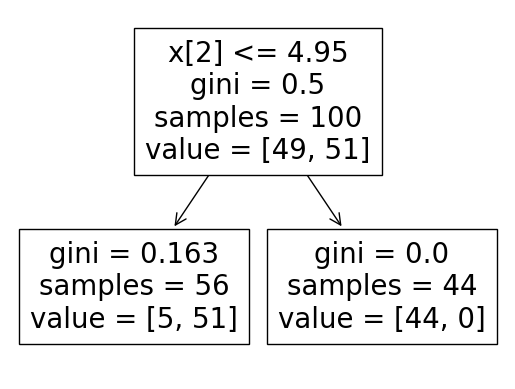

In [26]:
from sklearn import tree

#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [27]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [28]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [29]:
# setting pandas options to display more data
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# now the example data frame has predicted value of iteration 1.

# Let's compare the predicted value with 'Label' data and see
# if any data is misclassified
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1


In [35]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [37]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0


In [38]:
# let's see which data are misclassified
example.loc[example.misclassified == 1]

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
77,6.7,3.0,5.0,1.7,1,0.01,-1,1.0
83,6.0,2.7,5.1,1.6,1,0.01,-1,1.0
106,4.9,2.5,4.5,1.7,-1,0.01,1,1.0
121,5.6,2.8,4.9,2.0,-1,0.01,1,1.0
123,6.3,2.7,4.9,1.8,-1,0.01,1,1.0
126,6.2,2.8,4.8,1.8,-1,0.01,1,1.0
127,6.1,3.0,4.9,1.8,-1,0.01,1,1.0
138,6.0,3.0,4.8,1.8,-1,0.01,1,1.0


In [39]:
example.loc[example.misclassified == 0].head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0


In [40]:
# count of misclassified data i.e. misclassified=1/TRUE, and 
# correctly classified data i.e. misclassified = 0/FLASE
print('Total misclassified - TRUE', example.loc[example.misclassified == 1].shape[0])
print('Total misclassified - FALSE', example.loc[example.misclassified == 0].shape[0])

Total misclassified - TRUE 8
Total misclassified - FALSE 92


$$error = \sum{x_i . prob_i}$$
$$\text{where, } x_i \text{is misclassified data, } i \text{is index of data}$$

In [42]:
# error calculation for first round
e1 = sum(example['misclassified'] * example['probR1'])

In [43]:
e1

0.08

In [44]:
# Now, it's time to calculate the weight so that input data
# will be updated for the next round

from math import log

#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

alpha1

1.2211735176846021

In [45]:
import numpy as np

#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [47]:
new_weight

50     0.002949
51     0.002949
52     0.002949
53     0.002949
54     0.002949
55     0.002949
56     0.002949
57     0.002949
58     0.002949
59     0.002949
60     0.002949
61     0.002949
62     0.002949
63     0.002949
64     0.002949
65     0.002949
66     0.002949
67     0.002949
68     0.002949
69     0.002949
70     0.002949
71     0.002949
72     0.002949
73     0.002949
74     0.002949
75     0.002949
76     0.002949
77     0.033912
78     0.002949
79     0.002949
80     0.002949
81     0.002949
82     0.002949
83     0.033912
84     0.002949
85     0.002949
86     0.002949
87     0.002949
88     0.002949
89     0.002949
90     0.002949
91     0.002949
92     0.002949
93     0.002949
94     0.002949
95     0.002949
96     0.002949
97     0.002949
98     0.002949
99     0.002949
100    0.002949
101    0.002949
102    0.002949
103    0.002949
104    0.002949
105    0.002949
106    0.033912
107    0.002949
108    0.002949
109    0.002949
110    0.002949
111    0.002949
112    0

In [49]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [50]:
normalized_weight.head()

50    0.005435
51    0.005435
52    0.005435
53    0.005435
54    0.005435
dtype: float64

In [220]:
normalized_weight.tail()

145    0.005376
146    0.005376
147    0.005376
148    0.005376
149    0.005376
dtype: float64

In [51]:
example['prob2'] = round(normalized_weight,4)

In [52]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054


In [53]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

In [54]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1


[Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.442\nsamples = 100\nvalue = [67, 33]'),
 Text(0.25, 0.25, 'gini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.75, 0.25, 'gini = 0.155\nsamples = 71\nvalue = [65, 6]')]

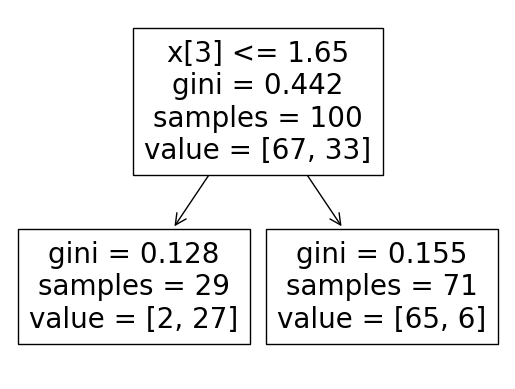

In [55]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [56]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1


In [57]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054,-1
149,5.9,3.0,5.1,1.8,-1,0.01,-1,0.0,0.0054,-1


In [58]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [59]:
print('Total misclassified - TRUE', example.loc[example.misclassified2 == 1].shape[0])
print('Total misclassified - FALSE', example.loc[example.misclassified2 == 0].shape[0])

Total misclassified - TRUE 6
Total misclassified - FALSE 94


In [60]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.08950000000000001

In [61]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

1.1598776369434263

In [62]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

normalized_weight.head()

50    0.002971
51    0.002971
52    0.002971
53    0.002971
54    0.002971
dtype: float64

In [63]:
example['prob3'] = round(normalized_weight,4)

In [64]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.003
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.003
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003


In [65]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'x[3] <= 1.75\ngini = 0.455\nsamples = 100\nvalue = [35, 65]'),
 Text(0.25, 0.25, 'gini = 0.239\nsamples = 72\nvalue = [10, 62]'),
 Text(0.75, 0.25, 'gini = 0.191\nsamples = 28\nvalue = [25, 3]')]

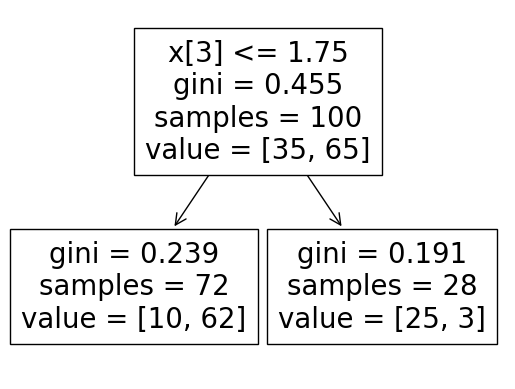

In [66]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [67]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [68]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.1854

In [69]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)
alpha3

0.7400907710412787

In [70]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

normalized_weight.head()

50    0.001838
51    0.001838
52    0.001838
53    0.001838
54    0.001838
dtype: float64

In [71]:
example['prob4'] = round(normalized_weight,4)

In [72]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0018
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0018
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0018
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0018
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.003,1,0.0,0.0018


In [73]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'x[1] <= 2.85\ngini = 0.497\nsamples = 100\nvalue = [54, 46]'),
 Text(0.25, 0.25, 'gini = 0.201\nsamples = 44\nvalue = [39, 5]'),
 Text(0.75, 0.25, 'gini = 0.392\nsamples = 56\nvalue = [15, 41]')]

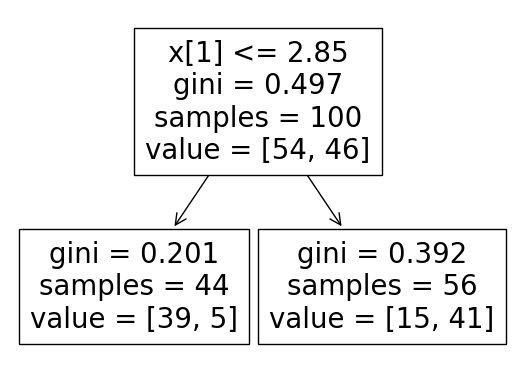

In [74]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [75]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [76]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.24179999999999988

In [248]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [249]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2933446720489712
0.8129237735301656
0.8932596412822493
0.3656716926863842


In [78]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] 

In [79]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [80]:
example['final_pred'] = np.sign(list(t))

In [81]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,-1,1.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,-1,1.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,-1,1.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,1,0.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,1,0.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0018,-1,1.0,1.0


In [82]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[45,  5],
       [ 2, 48]], dtype=int64)

In [83]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

93.0

## Using scikit-learn

In [256]:
from sklearn.ensemble import AdaBoostClassifier

iris = pd.read_csv("iris.csv")  
iris = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train.values, y_train)

clf.predict([[5.5, 2.5, 4.0, 1.3]])

clf.score(X_train.values, y_train)

0.96